   sepal-length  sepal-width  petal-length  petal-width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
shape:  (149, 5)
       sepal-length  sepal-width  petal-length  petal-width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        49
I

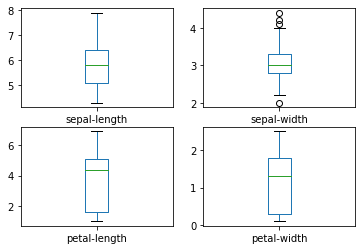

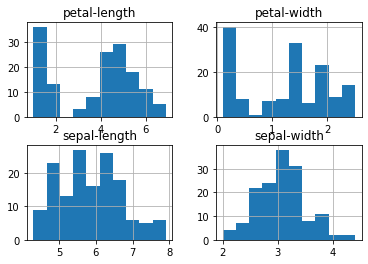

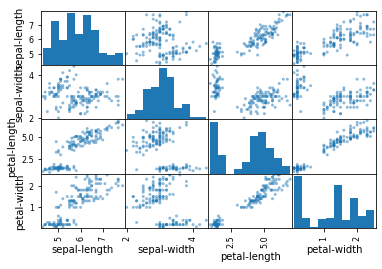

LR: 0.940909 (0.075286)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.055902)
CART: 0.932576 (0.072857)
NB: 0.958333 (0.076830)
SVM: 0.975000 (0.053359)


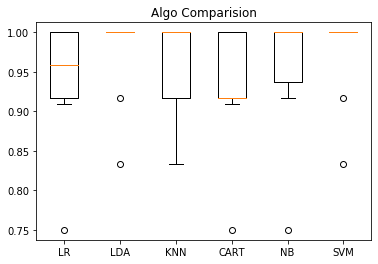

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
#import libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.data')
dataset.columns = names
print(dataset.head(5))
print("shape: ", dataset.shape)
print(dataset.describe())
print(dataset.groupby('class').size())
dataset.plot(kind='box', subplots=True, layout=(2, 2), sharex = False, sharey = False)
pyplot.show()
dataset.hist()
pyplot.show()
scatter_matrix(dataset)
pyplot.show()
#split the data into two array acc to 10-fold-cross validation
array = dataset.values
X = array[:, :4]
Y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)
# check the accuracy level of 6 diff algo
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# print them all
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))
# box and whisker plot
pyplot.boxplot(results, labels=names)
pyplot.title("Algo Comparision")
pyplot.show()
# use VSM model since it provide best accuracy
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
prediction = model.predict(X_validation)
# evaluate prediction
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))
print(classification_report(Y_validation, prediction))